# Project random forest classifier

##EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.shape

(4424, 35)

In [ ]:
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nationality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [ ]:
df.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nationality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.000000                1.000000     1.000000   
25%                      1.000000                1.000000     1.000000   
50%                      1.000000                1.000000     1.000000   
75%                      1.000000                1.000000     1.000000   
max                      1.000000               17.000000    21.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             4424.000000             4424.000000          4424.000000   
mean                12.322107               16.455244             7.317812   
std                  9.026251               11.044800             3.997828   
min                  1.000000                1.000000             1.000000   
25%                  2.000000                3.000000             5.000000   
50%                 13.000000               14.000000             6.000000   
75%                 22.000000               27.000000            10.000000   
max                 29.000000               34.000000            32.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                     4424.000000   
mean   ...                                        0.137658   
std    ...                                        0.690880   
min    ...                                        0.000000   
25%    ...                                        0.000000   
50%    ...                                        0.000000   
75%    ...                                        0.000000   
max    ...                                       12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                          4424.000000        

In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

Giá trị mục tiêu được dùng để đánh giá là Target với 3 giá trị ['Dropout', 'Graduate', 'Enrolled']; với mục tiêu là đánh giá khả năng tốt nghiệp hay bỏ học/chuyển ngành thì ta sẽ chỉ dùng tới giá trị ['Dropout', 'Graduate']

In [ ]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
df = df[df['Target'] != 'Enrolled']

In [ ]:
df.shape

(3630, 35)

Label Encode các feature

In [ ]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['Target'] = encoder.fit_transform(df['Target'])

<ipython-input-69-7ac88b6c6ef1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = encoder.fit_transform(df['Target'])


In [ ]:
df['Target'] = 1 - df['Target']

<ipython-input-70-726d12d97290>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = 1 - df['Target']


In [ ]:
df['Target'].value_counts()

0    2209
1    1421
Name: Target, dtype: int64

<Axes: title={'center': 'Distrbution of Target Value'}>

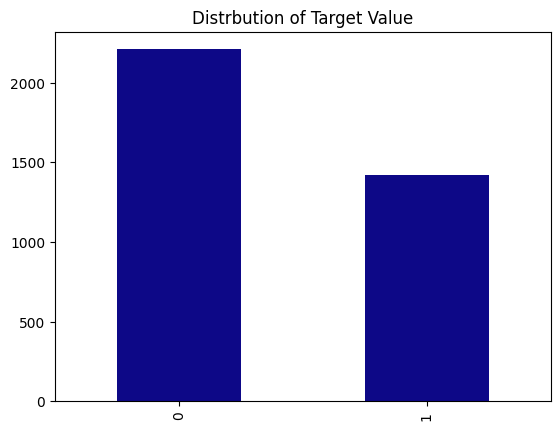

In [ ]:
df['Target'].value_counts().plot(kind = 'bar',
                                 title = 'Distrbution of Target Value',
                                 cmap = 'plasma')

Lựa chọn Feature thông qua Đánh giá tương quan giữa các feature và sử dụng Tree-based Feature Importance để hỗ trợ chọn lọc

In [ ]:
ds1 = df.copy()[['Marital status',
                 'Gender',
                 'Nationality',
                 'International',
                 'Previous qualification',
                 "Mother's qualification",
                 "Father's qualification",
                 "Mother's occupation",
                 "Father's occupation",
                 'Age at enrollment',
                 'Displaced',
                 'Debtor',
                 'Target']]

<Axes: >

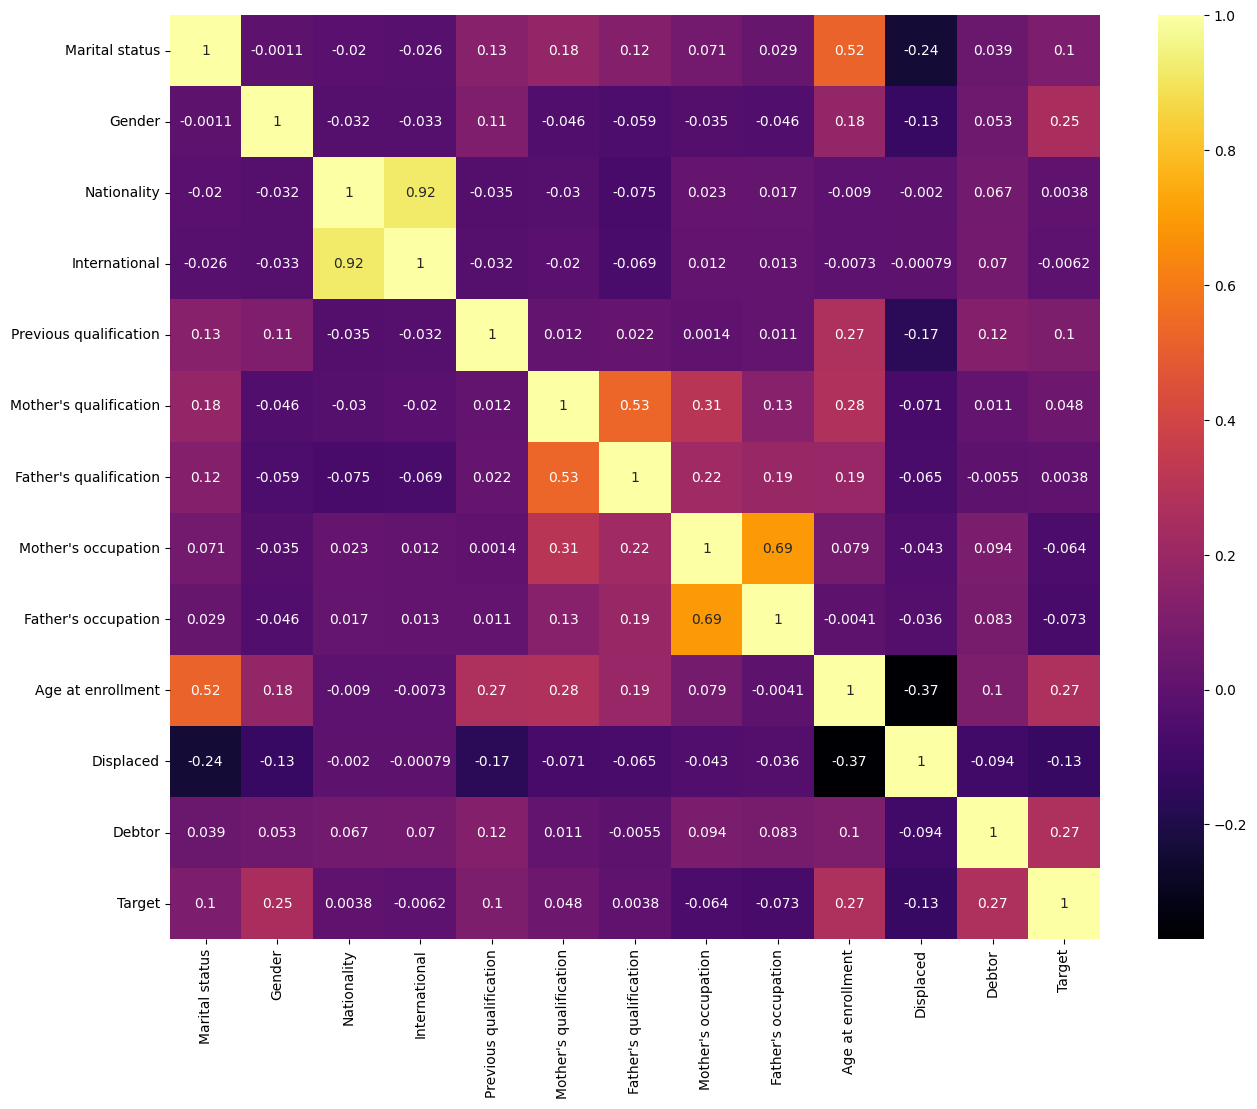

In [ ]:
plt.figure(figsize = (15, 12))
sns.heatmap(ds1.corr(),
            annot = True,
            cmap = 'inferno')

In [ ]:
ds2 = df.copy()[['Daytime/evening attendance',
                 'Tuition fees up to date',
                 'Course',
                 'Scholarship holder',
                 'Curricular units 1st sem (credited)',
                 'Curricular units 1st sem (enrolled)',
                 'Curricular units 1st sem (evaluations)',
                 'Curricular units 1st sem (approved)',
                 'Curricular units 1st sem (grade)',
                 'Curricular units 1st sem (without evaluations)',
                 'Curricular units 2nd sem (credited)',
                 'Curricular units 2nd sem (enrolled)',
                 'Curricular units 2nd sem (evaluations)',
                 'Curricular units 2nd sem (approved)',
                 'Curricular units 2nd sem (grade)',
                 'Curricular units 2nd sem (without evaluations)',
                 'Target']]

<Axes: >

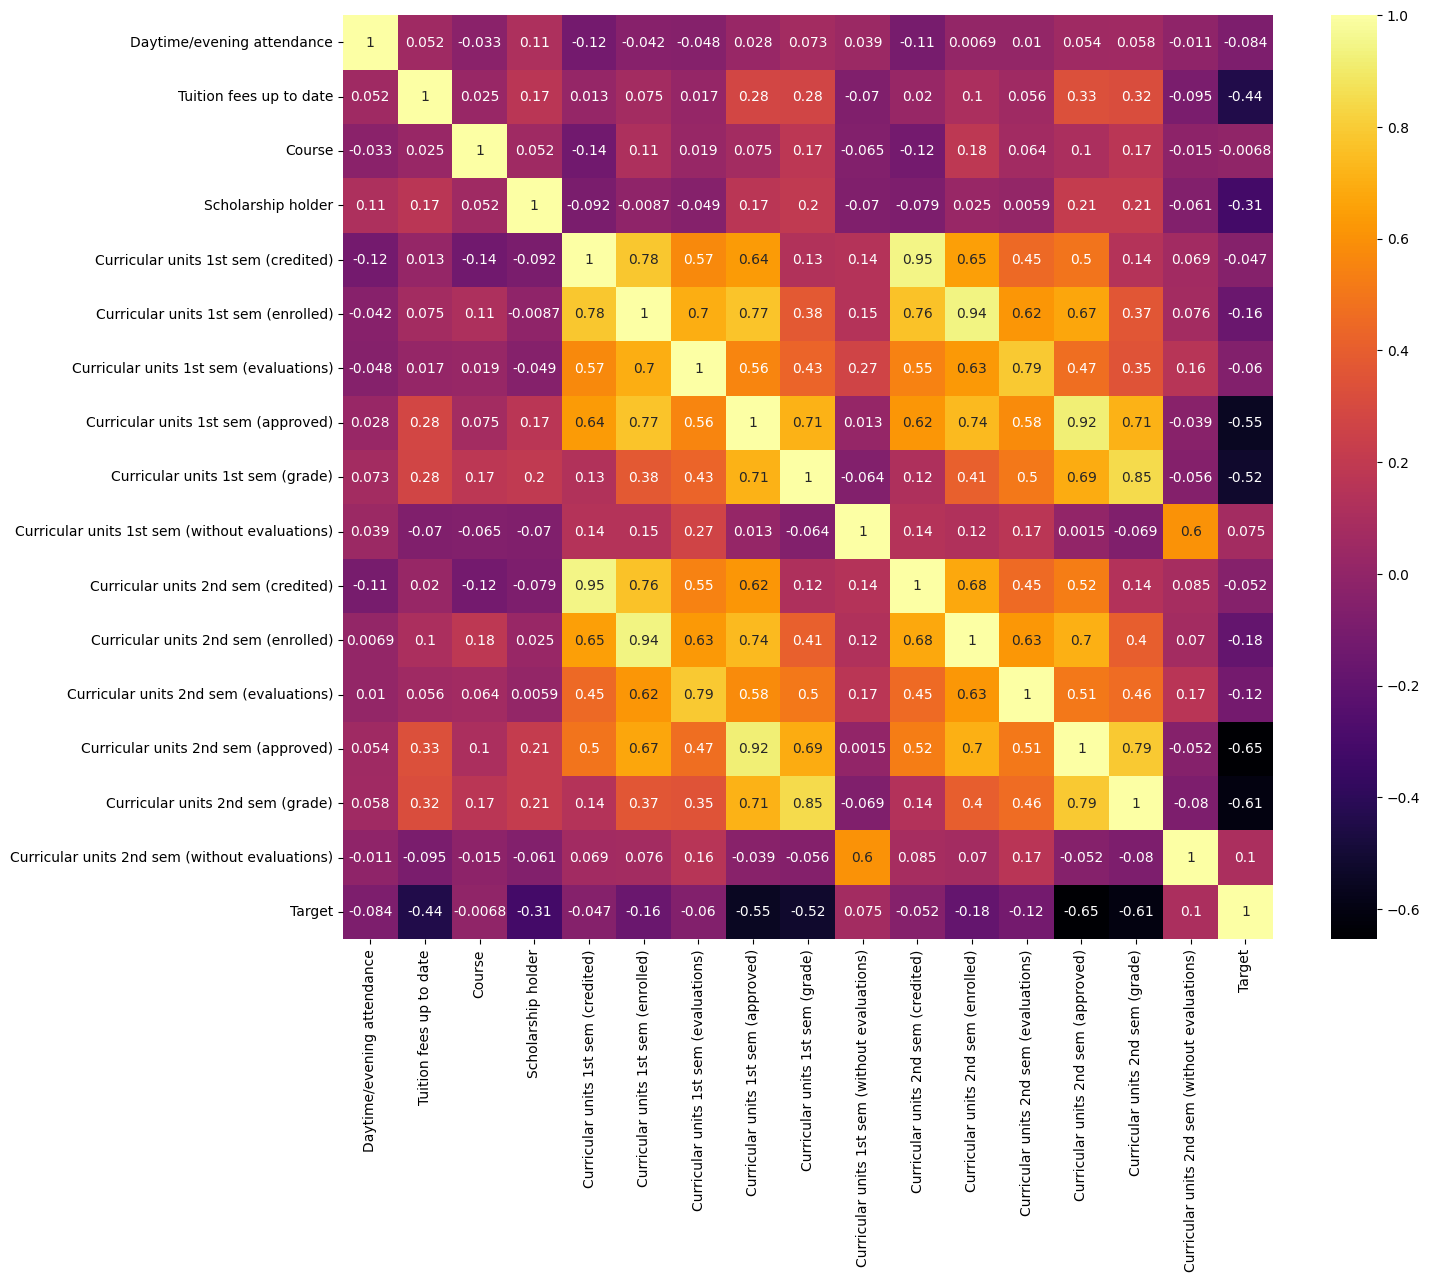

In [ ]:
plt.figure(figsize = (15, 12))
sns.heatmap(ds2.corr(),
            annot = True,
            cmap = 'inferno')

In [ ]:
corr = df.corr()

In [ ]:
df.corr()['Target']

Marital status                                    0.100479
Application mode                                  0.233888
Application order                                -0.094355
Course                                           -0.006814
Daytime/evening attendance                       -0.084496
Previous qualification                            0.102795
Nationality                                       0.003823
Mother's qualification                            0.048459
Father's qualification                            0.003850
Mother's occupation                              -0.064195
Father's occupation                              -0.073238
Displaced                                        -0.126113
Educational special needs                         0.007254
Debtor                                            0.267207
Tuition fees up to date                          -0.442138
Gender                                            0.251955
Scholarship holder                               -0.3130

<Axes: >

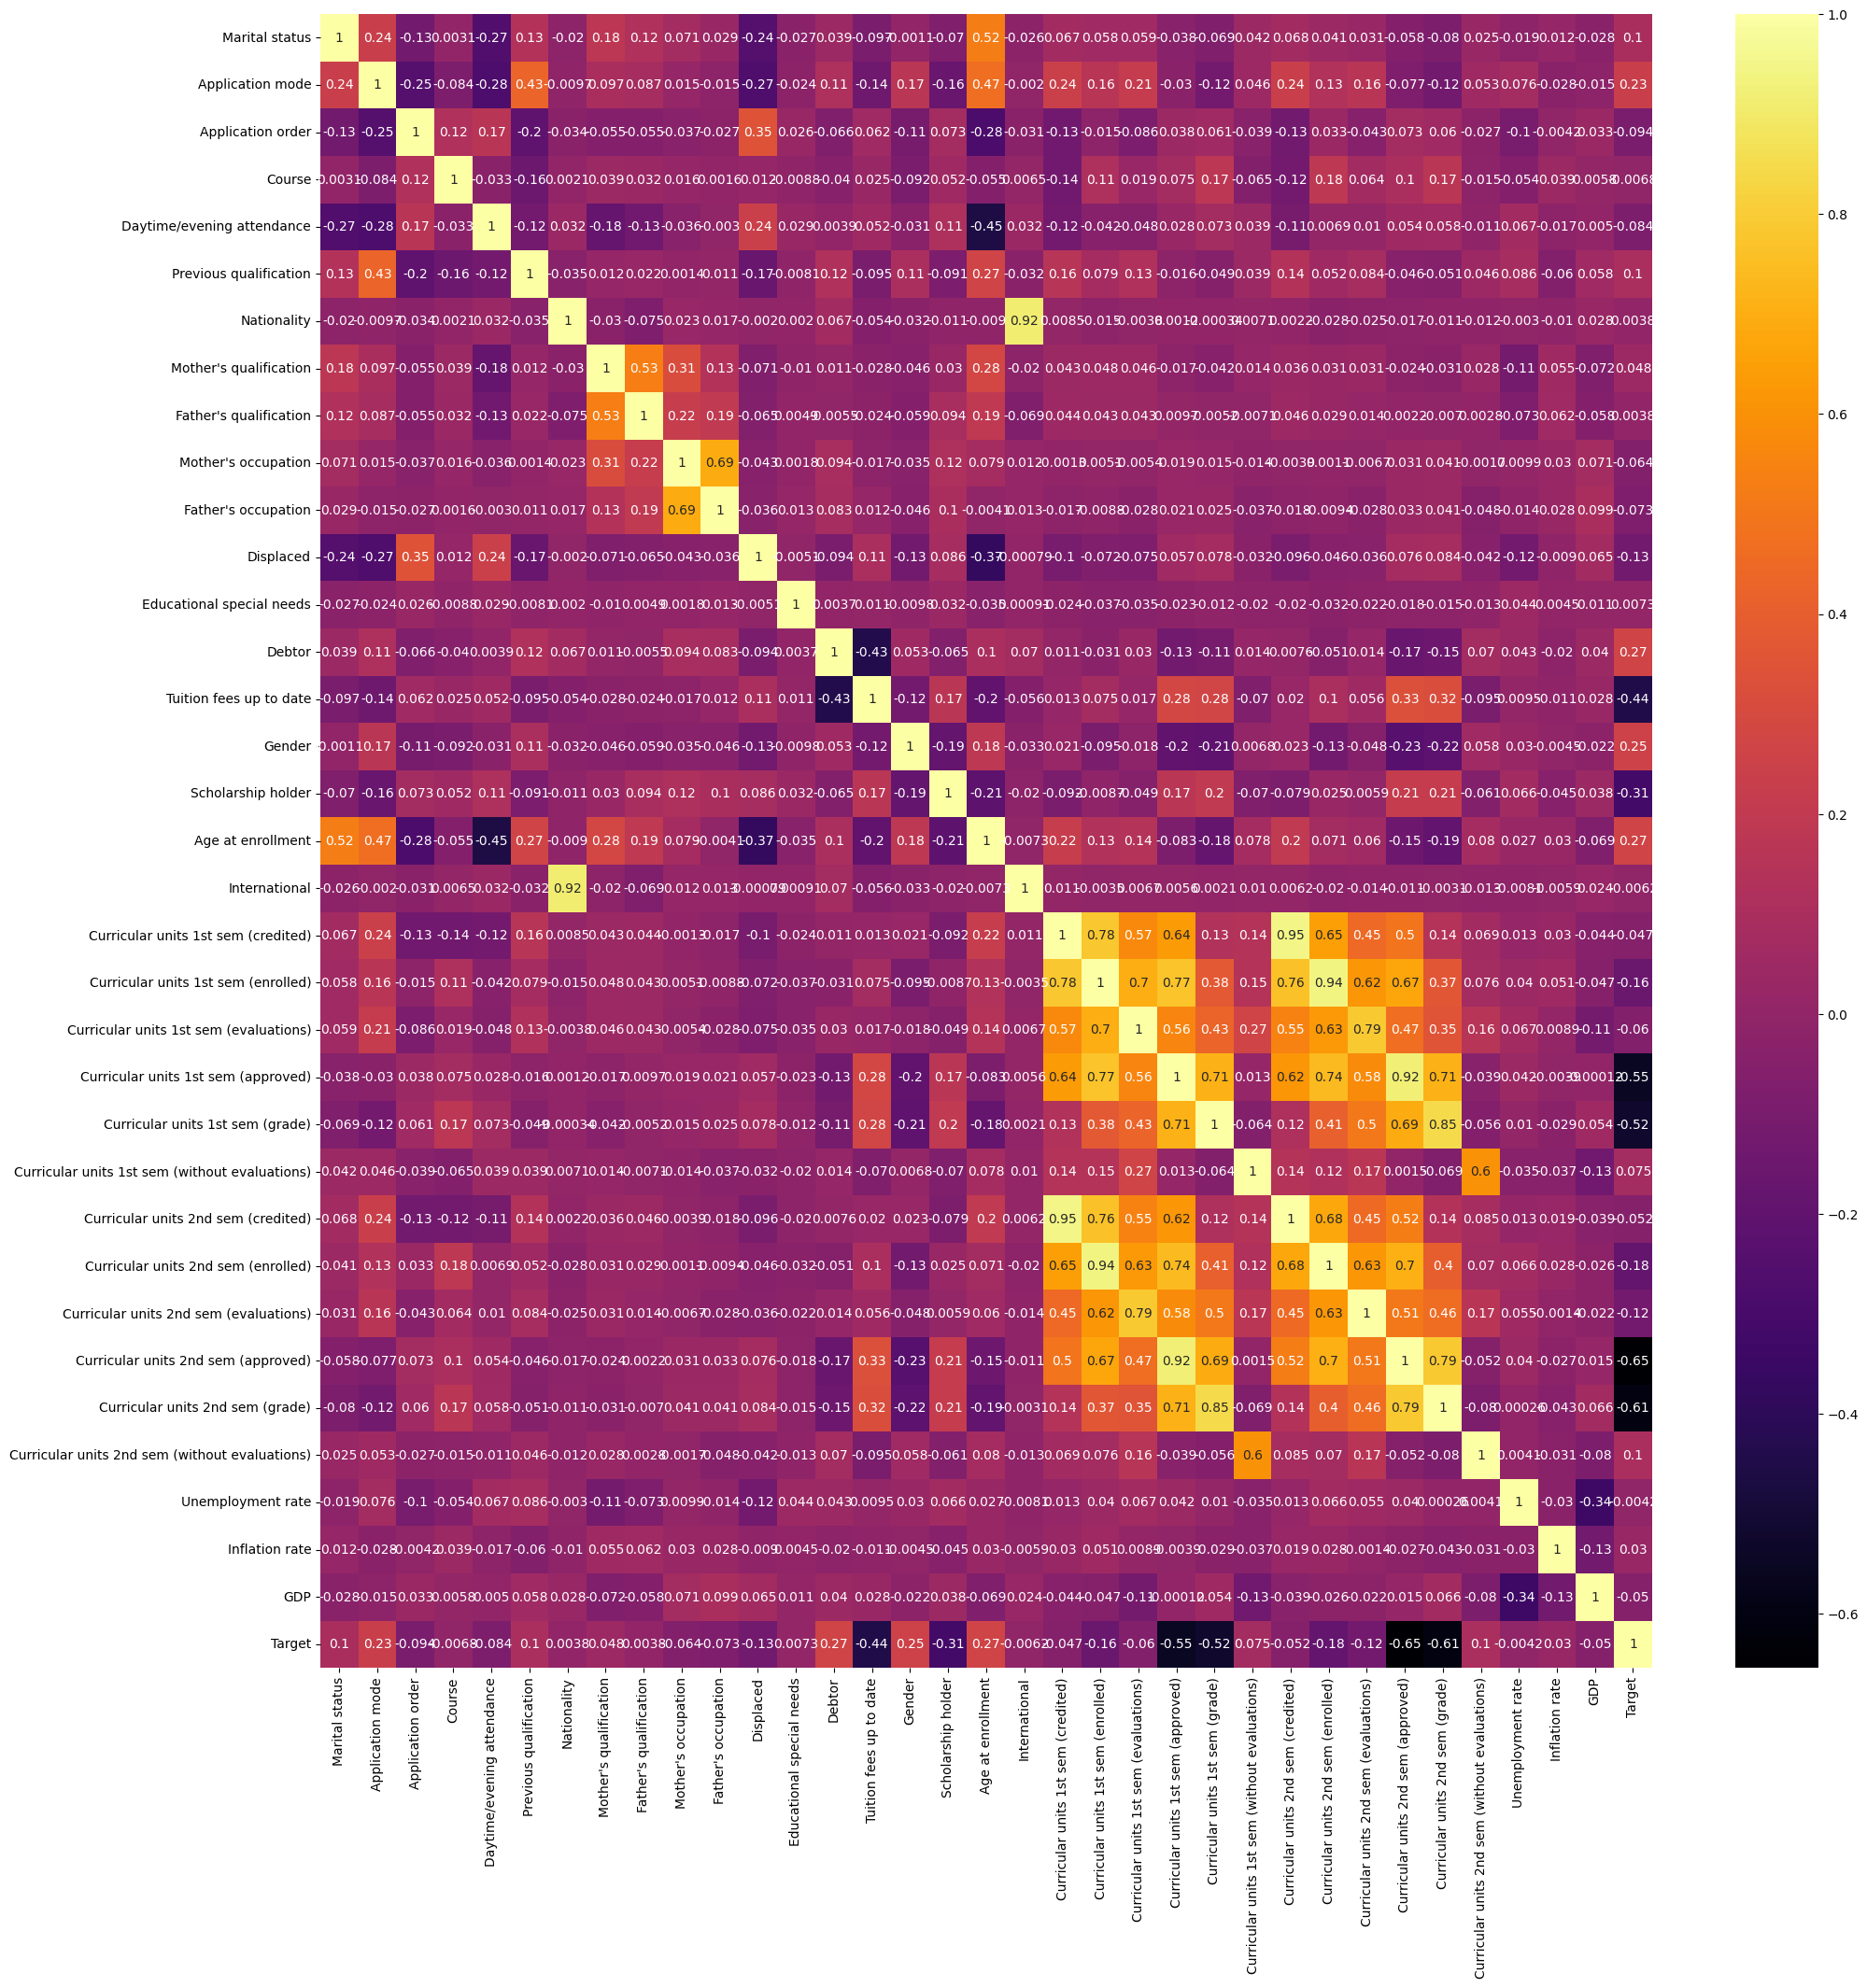

In [ ]:
plt.figure(figsize = (23, 23))
sns.heatmap(corr,
            annot = True,
            cmap = 'inferno')

<Axes: title={'center': 'Correlation With Target'}>

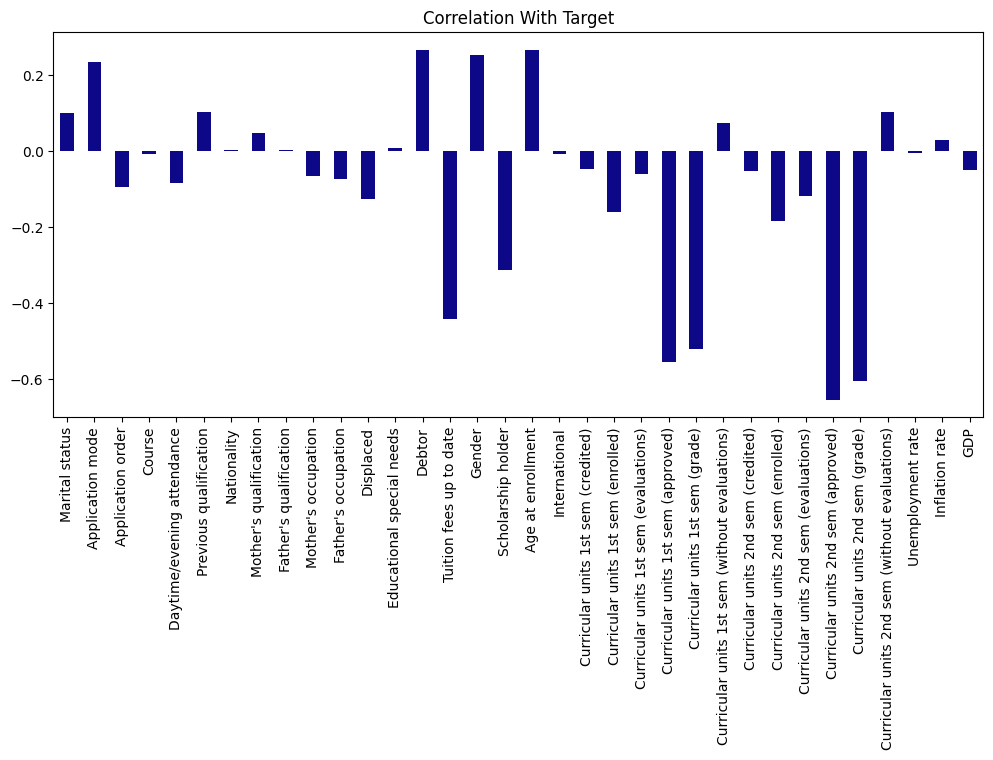

In [ ]:
dt_cor = df.drop('Target', axis = 1)

dt_cor.corrwith(df['Target']).plot.bar(
    title = 'Correlation With Target',
    figsize = (12, 5) ,
    cmap = 'plasma'
)

In [ ]:
df = df.drop(columns=['Curricular units 1st sem (credited)',
                      'Curricular units 1st sem (without evaluations)',
                      'Curricular units 2nd sem (credited)',
                      'Curricular units 2nd sem (without evaluations)',
                      'International'], axis = 1)

##Xây mô hình cơ bản

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = RF.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Accuracy on RF set:', accuracy)
print('Precision on RF set:', precision)
print('Recall on RF set:', recall)

Accuracy on RF set: 0.9017447199265382
Precision on RF set: 0.9182561307901907
Recall on RF set: 0.8140096618357487


Text(0.5, 427.9555555555555, 'Predicted label')

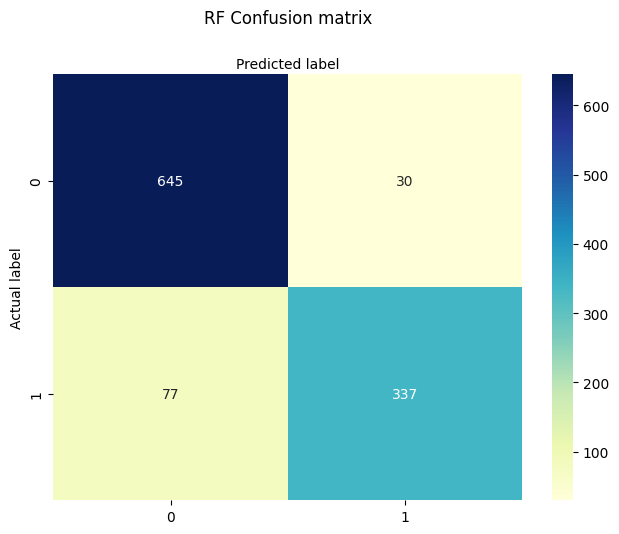

In [ ]:
from sklearn import metrics
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('RF Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Tối ưu feature, chỉ số

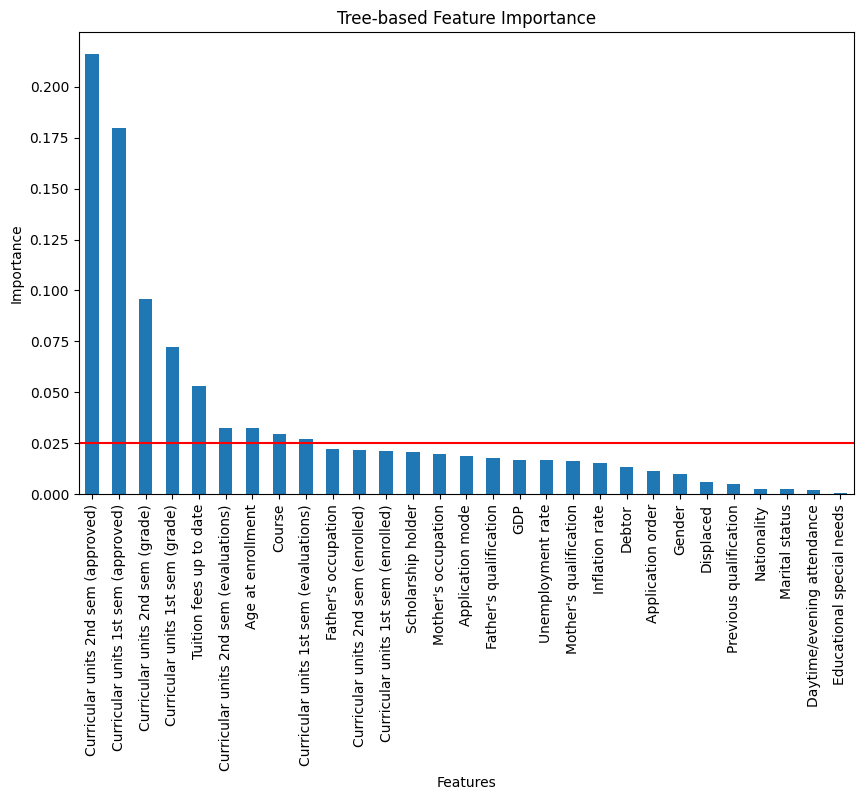

In [ ]:
RF_feature = RF.feature_importances_

feature_names = X.columns
feature_importances = pd.Series(RF_feature, index=feature_names)
sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Tree-based Feature Importance')
y_ticks = np.arange(0, sorted_importances.max(), 0.025)
plt.yticks(y_ticks)
plt.axhline(y=0.025, color='red')
plt.show()

In [ ]:
threshold = 0.025
selected_features = sorted_importances[sorted_importances > threshold].index.tolist()
print("Selected features:", selected_features)

Selected features: ['Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date', 'Curricular units 2nd sem (evaluations)', 'Age at enrollment', 'Course', 'Curricular units 1st sem (evaluations)']


In [ ]:
X_CV = X[selected_features]

X_scaler_CV = scaler.fit_transform(X_CV)

X_train_CV, X_test_CV, y_train, y_test = train_test_split(X_scaler_CV, y, test_size=0.3, random_state=42)

In [ ]:
merged_df = pd.concat([X_CV, y], axis=1)

chart = sns.pairplot(merged_df, hue='Target')
plt.show()

In [ ]:
#Upsampling
'''from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_upsampled, y_train_upsampled = ros.fit_resample(X_train_CV, y_train)'''
#RC = 0.833

'''from imblearn.combine import SMOTETomek
st = SMOTETomek(random_state=42)
X_train_upsampled, y_train_upsampled = st.fit_resample(X_train_CV, y_train)'''
#RC = 0.838

'''from imblearn.combine import SMOTEENN
se= SMOTEENN(random_state=42)
X_train_upsampled, y_train_upsampled = se.fit_resample(X_train_CV, y_train)'''
#RC = 0.826

'''from imblearn.over_sampling import ADASYN
ad = ADASYN(random_state=42)
X_train_upsampled, y_train_upsampled = ad.fit_resample(X_train_CV, y_train)'''
#RC =  0.842

from imblearn.over_sampling import BorderlineSMOTE
bs = BorderlineSMOTE(random_state=42)
X_train_upsampled, y_train_upsampled = bs.fit_resample(X_train_CV, y_train)
#RC = 0.852

In [ ]:
y_train_upsampled[y_train_upsampled == 1].count()

1534

In [ ]:
y_train_upsampled[y_train_upsampled == 0].count()

1534

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None , 10, 20],
    'min_samples_split': [2,4,5,6],
    'min_samples_leaf': [1,2,4,5],
}

Tập trung vào cải thiện chỉ số recall để máy dự đoán ra được nhiều nhất các sinh viên có xu hướng bỏ học mặc dù số lượng dự đoán sai có thể tăng

In [ ]:
from sklearn.metrics import make_scorer
#scorer = make_scorer(recall_score)
RF_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                     param_grid=param_grid,
                     cv=3,
                     scoring= make_scorer(recall_score),
                     verbose=0,
                     n_jobs=-1,
                     return_train_score=False)

In [ ]:
RF_grid.fit(X_train_upsampled, y_train_upsampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(recall_score))

In [ ]:
RF_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
RF_y_pred = RF_grid.predict(X_test_CV)

In [ ]:
accuracy = accuracy_score(y_test, RF_y_pred)
precision = precision_score(y_test, RF_y_pred)
recall = recall_score(y_test, RF_y_pred)
print('Accuracy on RF set:', accuracy)
print('Precision on RF set:', precision)
print('Recall on RF set:', recall)

Accuracy on RF set: 0.8861340679522498
Precision on RF set: 0.8485576923076923
Recall on RF set: 0.8526570048309179


Text(0.5, 427.9555555555555, 'Predicted label')

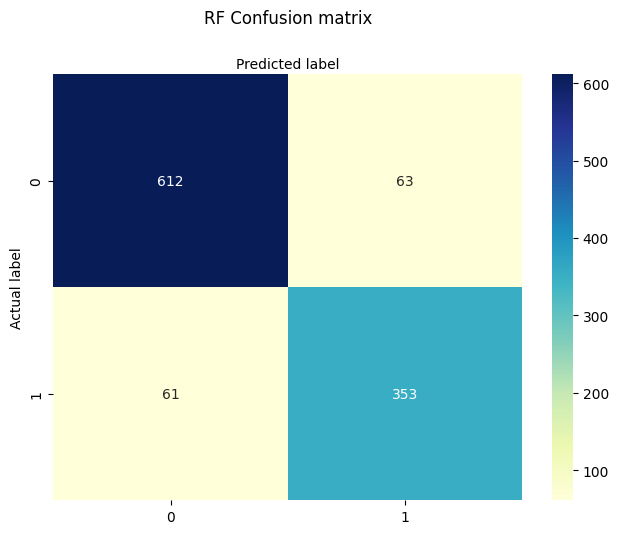

In [ ]:
from sklearn import metrics
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, RF_y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('RF Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')